# Significado das Colunas do Dataset de Jogadores de Futebol

| Coluna                 | Significado                                                   |
|------------------------|---------------------------------------------------------------|
| Name                   | Nome do jogador                                               |
| Nationality            | Nacionalidade do jogador                                      |
| National_Position       | Posição na seleção nacional                                   |
| National_Kit           | Número da camisa na seleção nacional                          |
| Club                   | Clube em que o jogador atua                                   |
| Club_Position          | Posição no clube                                              |
| Club_Kit               | Número da camisa no clube                                     |
| Club_Joining           | Ano de ingresso no clube                                      |
| Contract_Expiry        | Ano de expiração do contrato                                  |
| Rating                 | Avaliação geral do jogador (atributo global)                 |
| Height                 | Altura do jogador (em cm)                                     |
| Weight                 | Peso do jogador (em kg)                                       |
| Preffered_Foot         | Pé preferido (Direito ou Esquerdo)                            |
| Birth_Date             | Data de nascimento                                            |
| Age                    | Idade atual                                                   |
| Preffered_Position     | Posição preferida do jogador                                   |
| Work_Rate              | Nível de esforço ofensivo/defensivo (ex: Medium/High)        |
| Weak_foot              | Habilidade com o pé não dominante (1 a 5)                    |
| Skill_Moves            | Habilidade em dribles especiais (1 a 5)                       |
| Ball_Control           | Controle de bola                                              |
| Dribbling              | Habilidade em driblar                                         |
| Marking                | Marcação defensiva                                            |
| Sliding_Tackle         | Desarme deslizante                                            |
| Standing_Tackle        | Desarme em pé                                                 |
| Aggression             | Nível de agressividade                                        |
| Reactions              | Reações a jogadas                                             |
| Attacking_Position     | Posicionamento ofensivo                                       |
| Interceptions          | Intercepções                                                  |
| Vision                 | Visão de jogo                                                 |
| Composure              | Calma em situações de pressão                                  |
| Crossing               | Precisão em cruzamentos                                       |
| Short_Pass             | Habilidade em passes curtos                                   |
| Long_Pass              | Habilidade em passes longos                                   |
| Acceleration           | Aceleração                                                    |
| Speed                  | Velocidade máxima                                             |
| Stamina                | Resistência física                                            |
| Strength               | Força física                                                  |
| Balance                | Equilíbrio corporal                                           |
| Agility                | Agilidade                                                     |
| Jumping                | Capacidade de salto                                           |
| Heading                | Habilidade em cabeceio                                        |
| Shot_Power             | Potência de chute                                             |
| Finishing              | Finalização                                                   |
| Long_Shots             | Chutes de longa distância                                     |
| Curve                  | Efeito no chute                                               |
| Freekick_Accuracy      | Precisão em cobranças de falta                                |
| Penalties              | Precisão em pênaltis                                          |
| Volleys                | Habilidade em voleios                                         |
| GK_Positioning         | Posicionamento do goleiro                                     |
| GK_Diving              | Mergulho do goleiro                                           |
| GK_Kicking             | Chute do goleiro                                              |
| GK_Handling            | Segurada da bola pelo goleiro                                  |
| GK_Reflexes            | Reflexos do goleiro                                           |

# Clusterização de Jogadores

- Objetivo: Agrupar jogadores com características semelhantes com base em atributos técnicos e físicos (como velocidade, drible, finalização, força, defesa, etc.).

- Tipo de problema: Agrupamento não supervisionado (clustering).

**Exemplo de uso: Identificar perfis de jogadores — goleiros, defensores, meio-campistas e atacantes — e facilitar análise de talentos ou estratégias de recrutamento.**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
# Carregar CSV
df = pd.read_csv(
    r'/home/wallingson12/Github/Data science and ML/Análise Jogadores/FullData.csv',
    delimiter=","
)

# Mostrar as primeiras linhas bonitinho
display(df.head(10))

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,...,90,86,85,76,76,5,15,11,15,6
8,Zlatan Ibrahimović,Sweden,NaN,NaN,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,...,88,82,82,91,93,9,13,10,15,12
9,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,07/26/2011,2019.0,89,...,17,19,11,27,12,86,84,69,91,89


Todas as variáveis analisadas possuem p-valores muito baixos (<< 0.05) → o que indica que nenhuma delas segue uma distribuição normal

In [6]:
from scipy import stats
import pandas as pd

# Selecionar apenas colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Lista para armazenar os resultados
resultados_normalidade = []

# Iterar sobre as colunas numéricas
for coluna in colunas_numericas:
    dados = df[coluna].dropna()
    
    # Teste de Shapiro-Wilk
    stat, p_value = stats.shapiro(dados)

    # Armazenar resultado
    resultados_normalidade.append({
        'Variável': coluna,
        'Estatística': stat,
        'p-valor': p_value,
        'Distribuição Normal': 'Sim' if p_value > 0.05 else 'Não'
    })

# Criar tabela final
tabela_resultados = pd.DataFrame(resultados_normalidade)

# Exibir tabela ordenada pelo p-valor (opcional)
tabela_resultados = tabela_resultados.sort_values(by='p-valor')

display(tabela_resultados)

/home/wallingson12/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17587.
  res = hypotest_fun_out(*samples, **kwds)
/home/wallingson12/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17588.
  res = hypotest_fun_out(*samples, **kwds)


,Variável,Estatística,p-valor,Distribuição Normal
40,GK_Reflexes,0.544384,2.752136e-110,Não
37,GK_Diving,0.545950,3.390829e-110,Não
36,GK_Positioning,0.553241,9.034666e-110,Não
39,GK_Handling,0.554867,1.126294e-109,Não
38,GK_Kicking,0.560412,2.401620e-109,Não
1,Club_Kit,0.773679,1.205922e-92,Não
5,Weak_foot,0.800654,1.293977e-89,Não
6,Skill_Moves,0.841083,2.506120e-84,Não
7,Ball_Control,0.879609,4.483176e-78,Não
2,Contract_Expiry,0.886655,9.517951e-77,Não


** Verificando dados faltantes**

- Pelo que foi apurado nenhuma colunas que pretendemos utilizar tem dados faltando

In [7]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

missing = df.isnull().sum()
missing_cols = missing[missing > 0].sort_values(ascending=False)

print("Colunas com valores ausentes:\n")
print(missing_cols)
print("\nTotal de colunas com faltas:", len(missing_cols))

Colunas com valores ausentes:

National_Position    16513
National_Kit         16513
Club_Position            1
Club_Kit                 1
Club_Joining             1
Contract_Expiry          1
dtype: int64

Total de colunas com faltas: 6


**Remover colunas com Nan**

In [8]:
df = df.dropna()

**Confirmar que não restaram valores nulos**

In [9]:
faltantes_restantes = df.isnull().sum().sum()
if faltantes_restantes == 0:
    print("\n✅ Todos os valores ausentes foram tratados com sucesso.")
else:
    print(f"\n⚠️ Ainda restam {faltantes_restantes} valores ausentes.")


✅ Todos os valores ausentes foram tratados com sucesso.


**Tratando diferenças de escala**

#### Como podemos ver essas colunas estão em escalas bem diferentes

- Skill_Moves
- Weak_foot
- Skill_Moves
- Height
- Weight

In [10]:
df["Work_Rate"].unique()

array(['High / Low', 'Medium / Medium', 'High / Medium', 'Medium / Low',
       'High / High', 'Medium / High', 'Low / High', 'Low / Medium',
       'Low / Low'], dtype=object)

In [11]:
df["Weak_foot"].unique()

array([4, 5, 3, 2, 1])

In [12]:
df["Skill_Moves"].unique()

array([5, 4, 1, 3, 2])

In [13]:
df["Height"].unique()
df["Weight"].unique()

array(['80 kg', '72 kg', '68 kg', '85 kg', '92 kg', '82 kg', '79 kg',
       '74 kg', '91 kg', '90 kg', '76 kg', '75 kg', '70 kg', '67 kg',
       '62 kg', '78 kg', '73 kg', '84 kg', '81 kg', '87 kg', '60 kg',
       '83 kg', '71 kg', '65 kg', '88 kg', '86 kg', '94 kg', '77 kg',
       '61 kg', '66 kg', '59 kg', '93 kg', '69 kg', '64 kg', '63 kg',
       '95 kg', '58 kg', '98 kg', '96 kg', '97 kg', '89 kg', '55 kg'],
      dtype=object)

**Atribuindo novos valores para adequar essas colunas**

In [14]:
# ============================
# 0️⃣ Tratar Height e Weight
# ============================

# Height: remover "cm" e converter para float
df["Height"] = df["Height"].str.replace("cm", "").str.strip()
df["Height"] = pd.to_numeric(df["Height"], errors='coerce')

# Weight: remover "kg" e converter para float
df["Weight"] = df["Weight"].str.replace("kg", "").str.strip()
df["Weight"] = pd.to_numeric(df["Weight"], errors='coerce')

# Preencher possíveis NaNs com a média da coluna
df["Height"] = df["Height"].fillna(df["Height"].mean())
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())

# ============================
# 1️⃣ Mapeamento Weak_foot e Skill_Moves
# ============================
mapa_habilidades = {1:50, 2:60, 3:70, 4:80, 5:90}
df["Weak_foot"] = df["Weak_foot"].map(mapa_habilidades)
df["Skill_Moves"] = df["Skill_Moves"].map(mapa_habilidades)

# ============================
# 2️⃣ Mapeamento Work_Rate direto para cada combinação
# ============================
mapa_work_rate = {
    'High / Low': 75,
    'Medium / Medium': 66,
    'High / Medium': 82,
    'Medium / Low': 58,
    'High / High': 99,
    'Medium / High': 82,
    'Low / High': 75,
    'Low / Medium': 58,
    'Low / Low': 33
}

df["Work_Rate"] = df["Work_Rate"].map(mapa_work_rate)

**Limpeza e padronização**

- Criar mais variáveis

In [17]:
import numpy as np

# -------------------------------
# Função universal de classificação
# -------------------------------
def classificar(df, coluna, classe90, classe80, classe_default):
    df[f"{coluna}_class"] = np.where(
        df[coluna] >= 90, classe90,
        np.where(df[coluna] >= 80, classe80, classe_default)
    )

# -------------------------------
# Classificações
# -------------------------------

classificar(df, "Ball_Control",         "Mestre de domínio",        "Bom domínio",               "Domínio comum")
classificar(df, "Dribbling",            "Driblador nato",           "Driblador comum",           "Não dribla")
classificar(df, "Crossing",             "Mestre do cruzamento",     "Bom cruzamento",            "Cruzamento comum")
classificar(df, "Short_Pass",           "Mestre passe curto",       "Bom passe curto",           "Passe curto comum")
classificar(df, "Long_Pass",            "Mestre passe longo",       "Bom passe longo",           "Passe longo comum")
classificar(df, "Finishing",            "Finalizador nato",         "Finalizador bom",           "Finalizador comum")
classificar(df, "Long_Shots",           "Mestre do canhão",         "Bom chute longo",           "Chute longo comum")
classificar(df, "Curve",                "Super efeito",             "Bom efeito",                "Quase sem efeito")
classificar(df, "Freekick_Accuracy",    "Mestre das faltas",        "Bom batedor de falta",      "Batedor comum")
classificar(df, "Heading",              "Mestre jogo aéreo",        "Bom cabeceador",            "Cabeceador comum")
classificar(df, "Shot_Power",           "Canhão",                   "Chute forte",               "Chute fraco")

classificar(df, "Acceleration",         "Velocista",                "Boa velocidade",            "Lento")
classificar(df, "Speed",                "Flash",                    "Bom arranque",              "Lerdo")
classificar(df, "Stamina",              "Hulk",                     "Resistente",                "Fraco")
classificar(df, "Strength",             "Hulk",                     "Muito forte",               "Fraco")
classificar(df, "Balance",              "Mestre da agilidade",      "Ágil",                      "Pouco ágil")
classificar(df, "Agility",              "Mestre da agilidade",      "Ágil",                      "Pouco ágil")
classificar(df, "Jumping",              "Salto extraordinário",     "Bom salto",                 "Salto comum")

classificar(df, "Vision",               "Maestro",                  "Organizador",               "Visão comum")
classificar(df, "Interceptions",        "Mestre do roubo",          "Bom ladrão de bola",        "Rouba algumas bolas")

In [18]:
display(df.head(10))

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Shot_Power_class,Acceleration_class,Speed_class,Stamina_class,Strength_class,Balance_class,Agility_class,Jumping_class,Vision_class,Interceptions_class
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,Canhão,Velocista,Flash,Hulk,Muito forte,Pouco ágil,Mestre da agilidade,Salto extraordinário,Organizador,Rouba algumas bolas
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,Chute forte,Velocista,Bom arranque,Fraco,Fraco,Mestre da agilidade,Mestre da agilidade,Salto comum,Maestro,Rouba algumas bolas
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,Chute fraco,Velocista,Flash,Fraco,Fraco,Ágil,Mestre da agilidade,Salto comum,Organizador,Rouba algumas bolas
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,Chute forte,Boa velocidade,Lerdo,Resistente,Fraco,Pouco ágil,Ágil,Salto comum,Organizador,Rouba algumas bolas
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,Chute fraco,Lento,Lerdo,Fraco,Muito forte,Pouco ágil,Pouco ágil,Salto comum,Visão comum,Rouba algumas bolas
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,Chute fraco,Lento,Lerdo,Fraco,Fraco,Pouco ágil,Pouco ágil,Salto comum,Visão comum,Rouba algumas bolas
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,Chute forte,Lento,Bom arranque,Fraco,Muito forte,Pouco ágil,Pouco ágil,Bom salto,Visão comum,Rouba algumas bolas
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,...,Canhão,Velocista,Flash,Fraco,Muito forte,Pouco ágil,Pouco ágil,Bom salto,Visão comum,Rouba algumas bolas
9,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,07/26/2011,2019.0,89,...,Chute fraco,Lento,Lerdo,Fraco,Fraco,Pouco ágil,Pouco ágil,Salto comum,Visão comum,Rouba algumas bolas
10,Jérôme Boateng,Germany,RCB,17.0,FC Bayern,Sub,17.0,07/14/2011,2021.0,89,...,Chute fraco,Lento,Bom arranque,Fraco,Hulk,Pouco ágil,Pouco ágil,Salto comum,Visão comum,Bom ladrão de bola


 - Selecionei apenas as colunas que sejam de atributos técnicos ou físicos dos jogadores

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Converter Height e Weight para numérico (float), sem usar .str.replace
df["Height"] = pd.to_numeric(df["Height"], errors='coerce')
df["Weight"] = pd.to_numeric(df["Weight"], errors='coerce')

atributos_jogador = [
    # Técnicos
    "Ball_Control", "Dribbling", "Crossing", "Short_Pass", "Long_Pass",
    "Finishing", "Long_Shots", "Curve", "Freekick_Accuracy", "Penalties", "Volleys", "Heading", "Shot_Power",

    # Físicos
    "Height", "Weight", "Acceleration", "Speed", "Stamina", "Strength",
    "Balance", "Agility", "Jumping",

    # Mentais e defensivos
    "Vision", "Composure", "Reactions", "Attacking_Position",
    "Interceptions", "Aggression", "Marking", "Sliding_Tackle", "Standing_Tackle",

    # Goleiro
    "GK_Positioning", "GK_Diving", "GK_Kicking", "GK_Handling", "GK_Reflexes",

    "Weak_foot", "Work_Rate", "Skill_Moves", "Preffered_Position",

    # Classificação
    "Ball_Control_class", "Dribbling_class", "Crossing_class",
    "Short_Pass_class", "Long_Pass_class", "Finishing_class",
    "Long_Shots_class", "Curve_class", "Freekick_Accuracy_class",
    "Heading_class", "Shot_Power_class",

    "Acceleration_class", "Speed_class", "Stamina_class",
    "Strength_class", "Balance_class", "Agility_class",
    "Jumping_class",

    "Vision_class", "Interceptions_class"
]

# Selecionar apenas colunas existentes no df original
colunas_validas = [col for col in atributos_jogador if col in df.columns]

# Criar DataFrame 'atributos' mantendo Name + colunas válidas
atributos = df[['Name'] + colunas_validas].copy()

**Podemos análizar quais jogadores possuem a melhor média de atributos considerandos todos atributos**

In [21]:
# Garantir que todas as colunas usadas na média sejam numéricas
atributos[colunas_para_media] = atributos[colunas_para_media].apply(
    lambda col: pd.to_numeric(col, errors='coerce')
)

# Calcular a média geral por jogador
atributos["Media_Geral"] = atributos[colunas_para_media].mean(axis=1)

# Ordenar do maior para o menor
atributos_ordenado = atributos.sort_values("Media_Geral", ascending=False)

# Mostrar top 10
print(atributos_ordenado[["Name", "Media_Geral"]].head(10))

                  Name  Media_Geral
3          Luis Suárez    73.820513
37        Arturo Vidal    73.717949
56    Radja Nainggolan    73.205128
45         David Alaba    72.974359
7          Gareth Bale    72.820513
0    Cristiano Ronaldo    72.282051
107       Sami Khedira    71.282051
227  Ricardo Rodríguez    71.076923
145      Ander Herrera    71.076923
57             Marcelo    70.974359


**Há necessidade de normalização?**

In [22]:
print(atributos[colunas_para_media].describe())

       Ball_Control    Dribbling    Crossing   Short_Pass    Long_Pass  \
count   1075.000000  1075.000000  1075.00000  1075.000000  1075.000000   
mean      64.111628    60.505116    55.60093    64.337674    58.966512   
std       19.283502    21.556057    20.92186    17.000614    16.967622   
min       12.000000     7.000000     9.00000    11.000000    12.000000   
25%       60.000000    54.000000    44.00000    60.500000    50.000000   
50%       70.000000    67.000000    62.00000    69.000000    63.000000   
75%       76.000000    75.000000    71.00000    75.500000    71.000000   
max       95.000000    97.000000    90.00000    92.000000    93.000000   

         Finishing   Long_Shots        Curve  Freekick_Accuracy    Penalties  \
count  1075.000000  1075.000000  1075.000000        1075.000000  1075.000000   
mean     51.131163    54.405581    53.191628          49.273488    53.766512   
std      22.143650    21.749787    21.225984          20.590618    18.003269   
min       5.0

**ratamento de NaNs antes da normalização**

**Mesmo após a normalização, podem existir NaNs gerados por:**
- Conversão de strings para numérico (ex: Height, Weight)
- Mapeamento de colunas categóricas para números (ex: Weak_foot, Skill_Moves, Work_Rate)
   
Esses NaNs precisam ser identificados antes de aplicar KMeans ou PCA,
pois esses algoritmos não aceitam valores faltantes.
Aqui verificamos quais colunas ainda têm NaNs e visualizamos sua distribuição.

In [27]:
# Remover colunas *_class e outras não numéricas
colunas_para_media = [
    col for col in atributos.columns
    if col not in ["Preffered_Position"]
    and not col.endswith("_class")
    and atributos[col].dtype in ['float64', 'int64']
]

print("Colunas usadas para normalização:", colunas_para_media)

# Normalizar
scaler = StandardScaler()
atributos_normalizados = scaler.fit_transform(atributos[colunas_para_media])

atributos_norm_df = pd.DataFrame(
    atributos_normalizados,
    columns=colunas_para_media,
    index=atributos.index
)

atributos_norm_df["Name"] = atributos["Name"]

# Verificar NaNs
print("\nVerificando NaNs depois da normalização:")
print(atributos_norm_df.isna().sum())

Colunas usadas para normalização: ['Ball_Control', 'Dribbling', 'Crossing', 'Short_Pass', 'Long_Pass', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'Heading', 'Shot_Power', 'Height', 'Weight', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Vision', 'Composure', 'Reactions', 'Attacking_Position', 'Interceptions', 'Aggression', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Weak_foot', 'Work_Rate', 'Skill_Moves', 'Media_Geral']

Verificando NaNs depois da normalização:
Ball_Control          0
Dribbling             0
Crossing              0
Short_Pass            0
Long_Pass             0
Finishing             0
Long_Shots            0
Curve                 0
Freekick_Accuracy     0
Penalties             0
Volleys               0
Heading               0
Shot_Power            0
Height                0
Weight                0
Acceleration        

**Clustering KMeans**

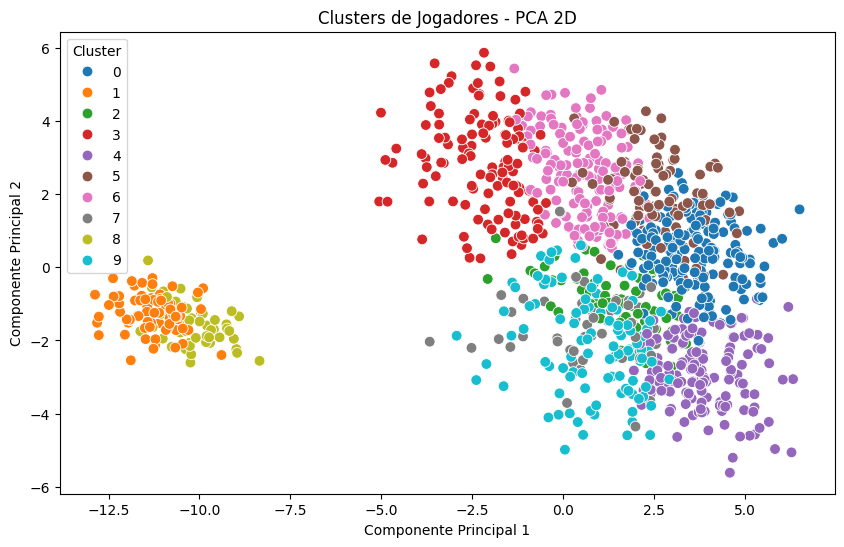

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Selecionar apenas atributos numéricos usados no clustering
X = atributos_norm_df.select_dtypes(include='number').drop(columns=['Cluster','PC1','PC2'], errors='ignore')

# Rodar KMeans
k = 10  # ajuste conforme desejar
kmeans = KMeans(n_clusters=k, random_state=42)
atributos_norm_df['Cluster'] = kmeans.fit_predict(X)

# PCA para visualização 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
atributos_norm_df['PC1'] = X_pca[:, 0]
atributos_norm_df['PC2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    data=atributos_norm_df,
    s=60
)
plt.title('Clusters de Jogadores - PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

**Quais são as características mais importantes em cada cluster?**

| Cluster | Perfil predominante                        | Principais atributos (Top 5)                                                                 |
|--------:|-------------------------------------------|-----------------------------------------------------------------------------------------------|
| 0       | Box-to-Box / Meio-campo completo          | Work_Rate, Media_Geral, Stamina, Interceptions, Sliding_Tackle                                |
| 1       | Goleiro moderno (Sweeper-Keeper)          | GK_Diving, Ball_Control, GK_Positioning, GK_Kicking, Short_Pass                               |
| 2       | Atacante Finalizador Físico               | Finishing, Volleys, Strength, Penalties, Attacking_Position                                   |
| 3       | Meia ofensivo criativo (Playmaker)        | Vision, Reactions, Finishing, Agility, Long_Shots                                             |
| 4       | Driblador técnico / atacante habilidoso   | Skill_Moves, Agility, Finishing, Vision, Volleys                                              |
| 5       | Volante defensivo construtor (Regista)    | Interceptions, Standing_Tackle, Long_Pass, Sliding_Tackle, Marking                            |
| 6       | Zagueiro clássico / defensor agressivo    | Marking, Sliding_Tackle, Standing_Tackle, Interceptions, Aggression                           |
| 7       | Zagueiro finalizador (perfil híbrido)     | Sliding_Tackle, Interceptions, Standing_Tackle, Marking, Finishing                             |
| 8       | Goleiro elite (completo)                  | GK_Reflexes, GK_Handling, GK_Positioning, GK_Kicking, GK_Diving                                |
| 9       | Atleta físico / powerhouse                | Strength, Height, Weight, Jumping, Reactions                                                  |

In [30]:
import pandas as pd
import numpy as np

# Selecionar apenas colunas numéricas relevantes
numericas = list(atributos_norm_df.select_dtypes(include='number').columns)
numericas = [c for c in numericas if c not in ['Cluster','PC1','PC2']]

clusters = atributos_norm_df['Cluster'].unique()
importances = {}

# Calcular top 5 atributos que mais diferenciam cada cluster
for c in clusters:
    mean_in = atributos_norm_df.loc[atributos_norm_df['Cluster']==c, numericas].mean()
    mean_out = atributos_norm_df.loc[atributos_norm_df['Cluster']!=c, numericas].mean()
    diff = (mean_in - mean_out).abs()
    top_features = diff.sort_values(ascending=False).head(5)
    importances[c] = top_features

# Mostrar resultado direto
for c, feats in importances.items():
    print(f"\nCluster {c} - Top 5 Atributos:")
    print(feats.to_string())


Cluster 4 - Top 5 Atributos:
Skill_Moves    1.576370
Agility        1.291709
Finishing      1.230461
Vision         1.226400
Volleys        1.217251

Cluster 8 - Top 5 Atributos:
GK_Reflexes       2.942202
GK_Handling       2.933361
GK_Positioning    2.921539
GK_Kicking        2.906769
GK_Diving         2.905864

Cluster 5 - Top 5 Atributos:
Interceptions      1.109433
Standing_Tackle    1.058672
Long_Pass          1.033247
Sliding_Tackle     0.994367
Marking            0.985096

Cluster 2 - Top 5 Atributos:
Finishing             1.253891
Volleys               1.179136
Strength              1.120186
Penalties             1.101542
Attacking_Position    1.064350

Cluster 6 - Top 5 Atributos:
Marking            1.177655
Sliding_Tackle     1.144902
Standing_Tackle    1.103814
Interceptions      1.064221
Aggression         0.750082

Cluster 0 - Top 5 Atributos:
Work_Rate         1.114932
Media_Geral       1.103304
Stamina           1.051426
Interceptions     0.992888
Sliding_Tackle    0.98

**Avaliação número de K *Método cotovelo)**

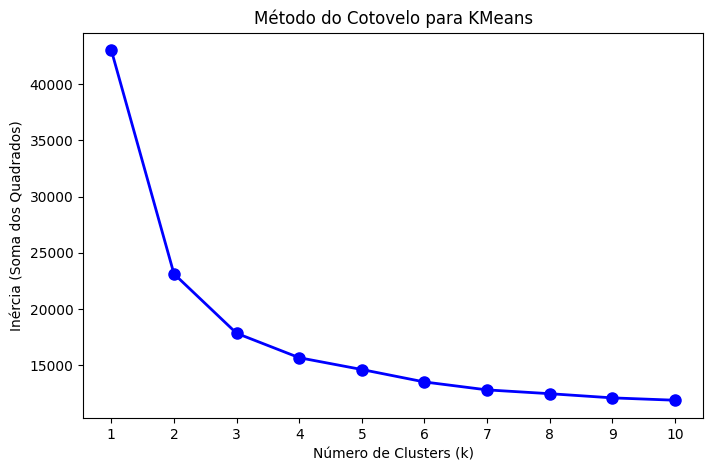

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecionar apenas colunas numéricas usadas no clustering
X = atributos_norm_df.select_dtypes(include='number').drop(columns=['Cluster','PC1','PC2'], errors='ignore')

# Testar vários valores de k
inertia = []
K = range(1, 11)  # testa de 1 a 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot do método do cotovelo
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos Quadrados)')
plt.title('Método do Cotovelo para KMeans')
plt.xticks(K)
plt.show()

**Testando com mais k**

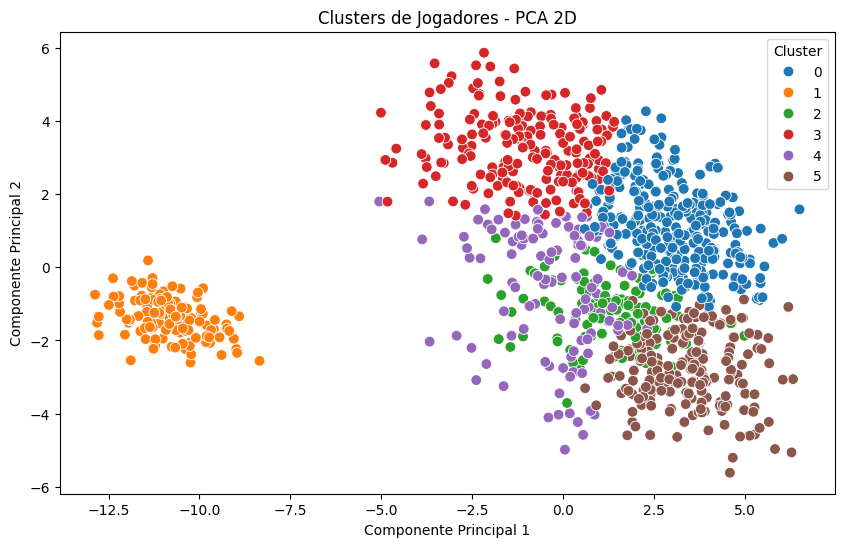

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Selecionar apenas atributos numéricos usados no clustering
X = atributos_norm_df.select_dtypes(include='number').drop(columns=['Cluster','PC1','PC2'], errors='ignore')

# Rodar KMeans
k = 6  # ajuste conforme desejar
kmeans = KMeans(n_clusters=k, random_state=42)
atributos_norm_df['Cluster'] = kmeans.fit_predict(X)

# PCA para visualização 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
atributos_norm_df['PC1'] = X_pca[:, 0]
atributos_norm_df['PC2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    data=atributos_norm_df,
    s=60
)
plt.title('Clusters de Jogadores - PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [33]:
import pandas as pd
import numpy as np

# Selecionar apenas colunas numéricas relevantes
numericas = list(atributos_norm_df.select_dtypes(include='number').columns)
numericas = [c for c in numericas if c not in ['Cluster','PC1','PC2']]

clusters = atributos_norm_df['Cluster'].unique()
importances = {}

# Calcular top 5 atributos que mais diferenciam cada cluster
for c in clusters:
    mean_in = atributos_norm_df.loc[atributos_norm_df['Cluster']==c, numericas].mean()
    mean_out = atributos_norm_df.loc[atributos_norm_df['Cluster']!=c, numericas].mean()
    diff = (mean_in - mean_out).abs()
    top_features = diff.sort_values(ascending=False).head(5)
    importances[c] = top_features

# Mostrar resultado direto
for c, feats in importances.items():
    print(f"\nCluster {c} - Top 5 Atributos:")
    print(feats.to_string())


Cluster 5 - Top 5 Atributos:
Skill_Moves    1.479507
Agility        1.311469
Finishing      1.192433
Balance        1.166929
Vision         1.143267

Cluster 1 - Top 5 Atributos:
GK_Diving         2.893177
GK_Reflexes       2.891221
GK_Positioning    2.888708
GK_Handling       2.883363
GK_Kicking        2.878748

Cluster 2 - Top 5 Atributos:
Finishing          1.198629
Sliding_Tackle     1.089206
Marking            1.054190
Volleys            1.036160
Standing_Tackle    1.010526

Cluster 0 - Top 5 Atributos:
Interceptions      1.261484
Sliding_Tackle     1.232924
Standing_Tackle    1.226359
Marking            1.204300
Media_Geral        1.154805

Cluster 3 - Top 5 Atributos:
Marking            1.150315
Sliding_Tackle     1.093023
Standing_Tackle    1.087428
Vision             1.060749
Interceptions      1.016516

Cluster 4 - Top 5 Atributos:
Strength     1.345501
Reactions    1.336886
Weight       0.954108
Height       0.952940
Composure    0.823376


**Calcular o desvio padrão dos atributos dentro de cada cluster**

In [ ]:
| Cluster | Perfil predominante                       | Principais atributos (Top 5)                                                                 |
|--------:|-------------------------------------------|-----------------------------------------------------------------------------------------------|
| 0       | Zagueiro / Volante defensivo              | Interceptions, Sliding_Tackle, Standing_Tackle, Marking, Media_Geral                           |
| 1       | Goleiro elite                             | GK_Diving, GK_Reflexes, GK_Positioning, GK_Handling, GK_Kicking                               |
| 2       | Atacante Finalizador                      | Finishing, Sliding_Tackle, Marking, Volleys, Standing_Tackle                                   |
| 3       | Zagueiro clássico / defensor agressivo    | Marking, Sliding_Tackle, Standing_Tackle, Vision, Interceptions                                |
| 4       | Atleta físico / defensor imponente        | Strength, Reactions, Weight, Height, Composure                                                |
| 5       | Driblador técnico / atacante habilidoso   | Skill_Moves, Agility, Finishing, Balance, Vision                                              |

**Distribuição**

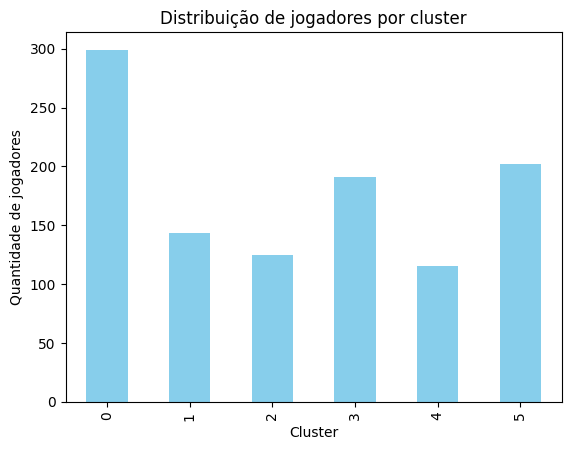

In [34]:
import matplotlib.pyplot as plt

atributos_norm_df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Quantidade de jogadores")
plt.title("Distribuição de jogadores por cluster")
plt.show()

In [47]:
import pandas as pd

# -----------------------------
# 1️⃣ Criar top 5 jogadores por cluster
# -----------------------------
top_jogadores_por_cluster = {}

for cluster_id, top_feats in importances.items():
    # Atributo mais importante do cluster
    atributo_top = top_feats.index[0]
    
    # Subset dos jogadores do cluster
    subset = atributos_norm_df[atributos_norm_df['Cluster'] == cluster_id]
    
    # Top 5 jogadores pelo atributo principal
    top5_idx = subset[atributo_top].nlargest(5).index
    
    # Criar DataFrame organizado para o cluster
    df_top5 = pd.DataFrame({
        'Jogador': df.loc[top5_idx, 'Name'].values,
        'Cluster': cluster_id,
        'Top_Atributo': atributo_top,
        'Valor': subset.loc[top5_idx, atributo_top].values
    })
    
    # Armazenar no dicionário
    top_jogadores_por_cluster[cluster_id] = df_top5.reset_index(drop=True)

# -----------------------------
# 2️⃣ Exibir tabelas separadas de forma organizada
# -----------------------------
for cluster_id in sorted(top_jogadores_por_cluster.keys()):
    print(f"### Cluster {cluster_id} - Top 5 Jogadores (Atributo: {top_jogadores_por_cluster[cluster_id]['Top_Atributo'][0]})")
    display(top_jogadores_por_cluster[cluster_id])


### Cluster 0 - Top 5 Jogadores (Atributo: Interceptions)


,Jogador,Cluster,Top_Atributo,Valor
0,Thiago Silva,0,Interceptions,1.705473
1,N'Golo Kanté,0,Interceptions,1.705473
2,Leonardo Bonucci,0,Interceptions,1.660850
3,Javier Mascherano,0,Interceptions,1.660850
4,Mats Hummels,0,Interceptions,1.616227


### Cluster 1 - Top 5 Jogadores (Atributo: GK_Diving)


,Jogador,Cluster,Top_Atributo,Valor
0,Manuel Neuer,1,GK_Diving,3.190870
1,De Gea,1,GK_Diving,3.145239
2,Hugo Lloris,1,GK_Diving,3.099607
3,Gianluigi Buffon,1,GK_Diving,3.099607
4,Anthony Lopes,1,GK_Diving,3.053976


### Cluster 2 - Top 5 Jogadores (Atributo: Finishing)


,Jogador,Cluster,Top_Atributo,Valor
0,Gonzalo Higuaín,2,Finishing,1.846482
1,Robert Lewandowski,2,Finishing,1.801302
2,Diego Costa,2,Finishing,1.710940
3,Harry Kane,2,Finishing,1.665760
4,Carlos Bacca,2,Finishing,1.665760


### Cluster 3 - Top 5 Jogadores (Atributo: Marking)


,Jogador,Cluster,Top_Atributo,Valor
0,Giorgio Chiellini,3,Marking,1.750125
1,Andrea Barzagli,3,Marking,1.669154
2,Miranda,3,Marking,1.628669
3,Pepe,3,Marking,1.588184
4,Kostas Manolas,3,Marking,1.588184


### Cluster 4 - Top 5 Jogadores (Atributo: Strength)


,Jogador,Cluster,Top_Atributo,Valor
0,Ashley Richards,4,Strength,0.550195
1,Marcos Caicedo,4,Strength,0.386944
2,Carlos Gruezo,4,Strength,0.142067
3,Cheick Doukouré,4,Strength,0.142067
4,Andraž Struna,4,Strength,0.060441


### Cluster 5 - Top 5 Jogadores (Atributo: Skill_Moves)


,Jogador,Cluster,Top_Atributo,Valor
0,Cristiano Ronaldo,5,Skill_Moves,2.827123
1,Neymar,5,Skill_Moves,2.827123
2,Thiago,5,Skill_Moves,2.827123
3,Ángel Di María,5,Skill_Moves,2.827123
4,Douglas Costa,5,Skill_Moves,2.827123


Comparação dos Clusters de Jogadores (k = 6 vs k = 8)

---

## 1️⃣ Clusters com k = 8

- **Cluster 0 (Defensores versáteis):** Jogadores equilibrados, boa stamina e capacidade de marcar e interceptar.  
- **Cluster 1 (Goleiros):** Totalmente separados pelos atributos de goleiro (GK_Diving, GK_Reflexes, etc.).  
- **Cluster 2 (Meio-campistas criativos):** Destacam-se pela visão de jogo, agilidade e capacidade de criar jogadas.  
- **Cluster 3 (Defensores físicos/robustos):** Jogadores altos, fortes e com bom salto, indicando presença física.  
- **Cluster 4 (Atacantes versáteis):** Combinam finalização com participação defensiva (sliding tackle, marking).  
- **Cluster 5 (Defensores agressivos):** Marcadores intensos, alta capacidade de desarme e pressão.  
- **Cluster 6 (Defensores táticos):** Especialistas em interceptações e posicionamento defensivo.  
- **Cluster 7 (Atacantes ágeis/dribladores):** Habilidade e agilidade predominam, foco em dribles e aceleração.

**Observação:** Com k = 8, é possível identificar nuances dentro de cada posição, como atacantes versáteis vs ágeis/dribladores, e defensores versáteis vs físicos vs táticos vs agressivos.

---

## 2️⃣ Clusters com k = 6

- **Cluster 0 (Defensores):** Combinação de atributos defensivos, stamina e marcação.  
- **Cluster 1 (Goleiros):** Claramente definido pelos atributos de goleiro.  
- **Cluster 2 (Atacantes/Finalizadores):** Jogadores com destaque em finalização, tiros longos e penaltis.  
- **Cluster 3 (Defensores físicos/robustos):** Força, reações, altura e presença física.  
- **Cluster 4 (Atacantes versáteis):** Combinação de força e atributos ofensivos.  
- **Cluster 5 (Atacantes habilidosos):** Predominância de dribles, agilidade, finishing e controle de bola.

**Observação:** Com k = 6, os clusters agrupam mais jogadores em menos grupos, perdendo alguns subtipos de defensores ou atacantes que aparecem quando k = 8.

---

## 3️⃣ Comparação dos perfis

| Tipo de jogador                 | k = 8                                  | k = 6                              |
|---------------------------------|----------------------------------------|------------------------------------|
| Goleiros                        | Cluster 1                               | Cluster 1                          |
| Defensores versáteis/agressivos | Clusters 0, 5, 6                        | Cluster 0                          |
| Defensores físicos               | Cluster 3                               | Cluster 3                          |
| Meio-campistas criativos         | Cluster 2                               | N/A                                |
| Atacantes versáteis              | Cluster 4                               | Cluster 4                          |
| Atacantes ágeis/dribladores      | Cluster 7                               | Cluster 5                          |

**Insight:**  
- k = 8 permite identificar melhor os subtipos dentro de defensores e atacantes.  
- k = 6 agrupa perfis próximos, dando visão mais resumida de atacantes e defensores.

---

## 4️⃣ Conclusão baseada nos dados

- Alguns clusters são idênticos em ambos os k (ex: goleiros).  
- Clusters adicionais em k = 8 mostram distinções entre atacantes e defensores que podem ser relevantes para scouting detalhado.  
- Clusters agregados em k = 6 destacam apenas posições principais e estilos gerais, perdendo nuances específicas.